In [58]:
# Import statements
import numpy as np
import pandas as pd
import sqlite3

In [59]:
# Connecting to sqlite 
conn = sqlite3.connect('pudl_subset.sqlite')

# Creating a cursor object using the cursor() method 
cursor = conn.cursor()

In [60]:
# Show all tables in database
tables_query = """SELECT name FROM sqlite_master  
                  WHERE type='table';"""
cursor.execute(tables_query)
table_list = cursor.fetchall()
print(table_list)

[('yearly_plant_generation',), ('monthly_generation_grouped',)]


### Database columns explained
Descriptions from: https://data.catalyst.coop/pudl/out_ferc1__yearly_all_plants

- report_year: "Four-digit year in which the data was reported."
- utility_id_ferc1: "PUDL-assigned utility ID, identifying a FERC1 utility. This is an auto- incremented ID and is not expected to be stable from year to year."
- utility_id_pudl: "A manually assigned PUDL utility ID. May not be stable over time."
- utility_name_ferc1: "Name of the responding utility, as it is reported in FERC Form 1. For human readability only."
- plant_id_pudl: "A manually assigned PUDL plant ID. May not be constant over time."
- plant_id_ferc1: "Algorithmically assigned PUDL FERC Plant ID. WARNING: NOT STABLE BETWEEN PUDL DB INITIALIZATIONS."
- plant_name_ferc1: "Name of the plant, as reported to FERC. This is a freeform string, not guaranteed to be consistent across references to the same plant."
- net_generation_mwh: "Net electricity generation for the specified period in megawatt-hours (MWh)."
- fuel_cost_per_mwh: "Derived from MCOE, a unit level value. Average fuel cost per MWh of heat content in nominal USD."
- plant_type: "Type of plant."
- fuel_type: "Type of fuel."
- net_load_mwh: "Net output for load (net generation - energy used for pumping) in megawatt- hours."

### Import database into Pandas dataframe
There is currently only one table in the database. This is how you import it into Pandas.

In [61]:
pudl_yearly_df = pd.read_sql_query("SELECT * FROM yearly_plant_generation", conn)

pudl_yearly_df.tail

<bound method NDFrame.tail of        report_year  utility_id_ferc1  utility_id_pudl_x  \
0             1995               185                 69   
1             1996               185                 69   
2             1998               185                 69   
3             1999               185                 69   
4             2001               185                 69   
...            ...               ...                ...   
79322         2023               300                287   
79323         2023               335                171   
79324         2023               393                 63   
79325         2023               393                 63   
79326         2023               395                308   

                                 utility_name_ferc1  plant_id_pudl  \
0                                   Cleco Power LLC              1   
1                                   Cleco Power LLC              1   
2                                   Cleco Power LLC

### Import monthly data into Pandas from database
This is likely the data we will use the most

In [62]:
# This doesn't currently work
pudl_monthly_df = pd.read_sql_query("SELECT * FROM monthly_generation_grouped", conn)
pudl_monthly_df.head()

,report_date,state,SUM(net_generation_mwh)
0,2001-01-01,None,3.284300e+04
1,2001-01-01,AK,3.282403e+05
2,2001-01-01,AL,8.843672e+06
3,2001-01-01,AR,3.886423e+06
4,2001-01-01,AZ,6.685144e+06


In [63]:
# Different values for type of plant
plant_types = pudl_yearly_df['plant_type'].unique()
print("Different plant types:", plant_types)

# Different values for type of fuel
fuel_types = pudl_yearly_df['fuel_type'].unique()
print("Different fuel types:", fuel_types)

Different plant types: ['steam' 'combustion_turbine' 'hydro' 'internal_combustion' None
 'combined_cycle' 'wind' 'nuclear' 'run_of_river' 'storage' 'geothermal'
 'photovoltaic' 'solar_thermal' 'run_of_river_with_storage' 'fuel_cell']
Different fuel types: [None 'hydro' 'wind' 'oil' 'solar' 'gas' 'coal' 'other' 'nuclear' 'waste']


In [64]:
# Function to get the schema of a table
def get_table_schema(table_name):
    schema_query = f"PRAGMA table_info({table_name});"
    cursor.execute(schema_query)
    schema = cursor.fetchall()
    return schema

# Get schema for each table
for table in table_list:
    table_name = table[0]
    schema = get_table_schema(table_name)
    print(f"Schema for table {table_name}:")
    for column in schema:
        print(f"  {column[1]} ({column[2]})")
    print("\n")

Schema for table yearly_plant_generation:
  report_year (BIGINT)
  utility_id_ferc1 (BIGINT)
  utility_id_pudl_x (BIGINT)
  utility_name_ferc1 (TEXT)
  plant_id_pudl (BIGINT)
  plant_id_ferc1 (FLOAT)
  plant_name_ferc1 (TEXT)
  net_generation_mwh (FLOAT)
  fuel_cost_per_mwh (FLOAT)
  plant_type (TEXT)
  fuel_type (TEXT)
  net_load_mwh (FLOAT)
  plant_id_eia (FLOAT)
  plant_name_eia (TEXT)
  city (TEXT)
  county (TEXT)
  latitude (FLOAT)
  longitude (FLOAT)
  state (TEXT)
  street_address (TEXT)
  zip_code (TEXT)
  utility_id_eia (FLOAT)
  utility_name_eia (TEXT)
  utility_id_pudl_y (FLOAT)


Schema for table monthly_generation_grouped:
  report_date (TEXT)
  state (TEXT)
  SUM(net_generation_mwh) (FLOAT)




In [65]:
# Query to select the first few rows of the yearly_plant_generation table
yearly_plant_generation = pd.read_sql_query("SELECT * FROM yearly_plant_generation", conn)

# Display the head of the dataframe
yearly_plant_generation.head()

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
0,1995,185,69,Cleco Power LLC,1,1468.0,dolet hills,2246698.0,15.078641,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
1,1996,185,69,Cleco Power LLC,1,1468.0,dolet hills,2040348.0,16.029879,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
2,1998,185,69,Cleco Power LLC,1,1468.0,dolet hills,2172549.0,16.347895,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
3,1999,185,69,Cleco Power LLC,1,1468.0,dolet hills,1811051.0,19.006699,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0
4,2001,185,69,Cleco Power LLC,1,1468.0,dolet hills,2268409.0,18.334631,steam,...,Mansfield,None,32.030556,-93.569168,LA,963 Power Plant Rd,71052,3265.0,Cleco Power LLC,69.0


In [73]:
# Group by report_year and state, then sum the net_generation_mwh for each group
combined_states_yearly_df = yearly_plant_generation.groupby(['report_year', 'state'])['net_generation_mwh'].sum().reset_index()

# Display the combined dataframe
combined_states_yearly_df.tail()

,report_year,state,net_generation_mwh
1387,2023,VT,2.136242e+05
1388,2023,WA,2.902733e+07
1389,2023,WI,6.805362e+07
1390,2023,WV,7.785721e+07
1391,2023,WY,4.132082e+07


In [72]:
# Filter out states with zero net generation
filtered_yearly_plant_generation = yearly_plant_generation[yearly_plant_generation['net_generation_mwh'] > 0]

# Group by report_year and calculate the mean of net_generation_mwh for each year
average_generation_per_year = filtered_yearly_plant_generation.groupby('report_year')['net_generation_mwh'].mean().reset_index()

# Display the average generation per year
average_generation_per_year

,report_year,net_generation_mwh
0,1994,1.228911e+06
1,1995,1.236614e+06
2,1996,1.032574e+06
3,1997,1.233802e+06
4,1998,1.244649e+06
5,1999,1.426356e+06
6,2000,1.506155e+06
7,2001,1.390824e+06
8,2002,1.327151e+06
9,2003,1.463940e+06


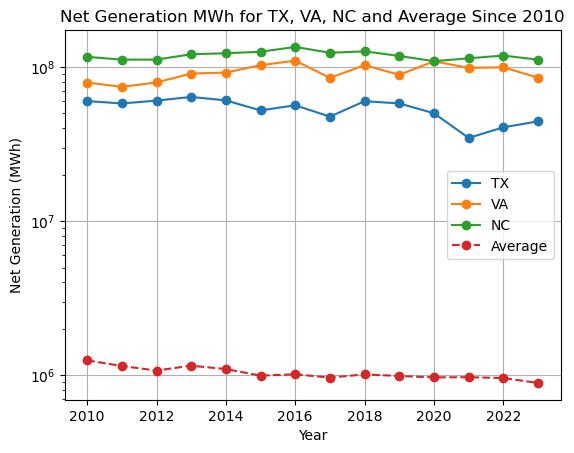

In [74]:
import matplotlib.pyplot as plt

# Filter data for the states TX, VA, and NC since 2010
states_to_plot = ['TX', 'VA', 'NC']
filtered_data = combined_states_yearly_df[(combined_states_yearly_df['state'].isin(states_to_plot)) & (combined_states_yearly_df['report_year'] >= 2010)]

# Plot the data for each state
for state in states_to_plot:
    state_data = filtered_data[filtered_data['state'] == state]
    plt.plot(state_data['report_year'], state_data['net_generation_mwh'], marker='o', label=state)

# Plot the average generation per year since 2010
average_data = average_generation_per_year[average_generation_per_year['report_year'] >= 2010]
plt.plot(average_data['report_year'], average_data['net_generation_mwh'], marker='o', linestyle='--', label='Average')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.title('Net Generation MWh for TX, VA, NC and Average Since 2010')
plt.legend()
plt.grid(True)

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.show()

In [68]:
# Query to select entries from yearly_plant_generation where state is VA
va_entries_query = "SELECT * FROM yearly_plant_generation WHERE state = 'VA'"

# Execute the query and store the result in a dataframe
va_entries_df = pd.read_sql_query(va_entries_query, conn)

# Display the dataframe
#va_entries_df

In [ ]:
# Group the dataframe by report_year and calculate the sum of net_generation_mwh and net_load_mwh for each year
grouped_va_entries_df = va_entries_df.groupby('report_year')[['net_generation_mwh', 'net_load_mwh']].sum(numeric_only=True)

# Display the grouped dataframe
grouped_va_entries_df

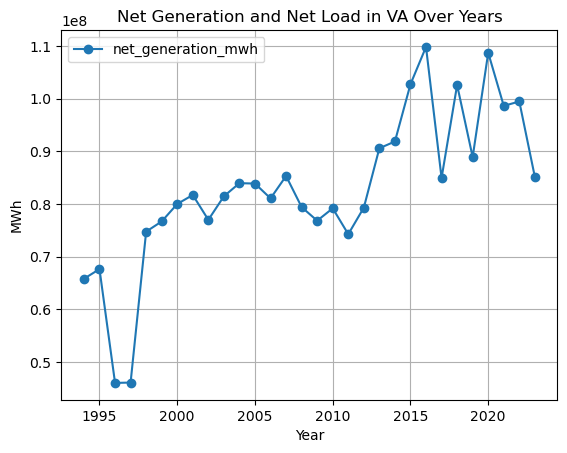

In [70]:
import matplotlib.pyplot as plt

# Plotting the data
grouped_va_entries_df.plot(y=['net_generation_mwh'], kind='line', marker='o')
plt.title('Net Generation and Net Load in VA Over Years')
plt.xlabel('Year')
plt.ylabel('MWh')
plt.grid(True)
plt.show()

In [75]:
import os
import pandas as pd

# Define the folder path
folder_path = 'data_center_locations'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
all_locations_df = pd.concat(dataframes, ignore_index=True)

# Display the combined dataframe
all_locations_df.head()

,Continent,Location,Country,Latitude,Longitude,Year Established
0,Asia,Hangzhou,China,30.2741,120.1551,-
1,Asia,Beijing,China,39.9042,116.4074,-
2,Asia,Shanghai,China,31.2304,121.4737,-
3,Asia,Shenzhen,China,22.5431,114.0579,-
4,Asia,Hong Kong,Hong Kong,22.3193,114.1694,-


In [78]:
# Filter the DataFrame to include only North American values
north_america_df = all_locations_df[all_locations_df['Continent'] == 'North America']

# Display the filtered DataFrame
north_america_df

,Continent,Location,Country,Latitude,Longitude,Year Established
10,North America,"Ashburn, Virginia",United States,39.0215,-77.4579,-
11,North America,Northern Virginia (Multiple locations),United States,-,-,-
12,North America,"Boardman, Oregon",United States,45.8696,-119.688,-
13,North America,"Dublin, Ohio",United States,40.1386,-83.0901,-
14,North America,"Montreal, Quebec",Canada,45.504,-73.5747,-
24,North America,"Maiden, North Carolina",United States,35.6543,-81.218,2010
25,North America,"Newark, California",United States,37.529,-122.0446,-
28,North America,"Ashburn, Virginia",United States,39.0215,-77.4579,-
29,North America,"Chicago, Illinois",United States,41.8781,-87.6298,-
30,North America,"Dallas, Texas",United States,32.7767,-96.797,-


In [82]:
# Extract state values from the Location column
all_locations_df['State'] = all_locations_df['Location'].str.extract(r',\s*([A-Z]{2})\b')

# Display the updated dataframe
all_locations_df.head()

,Continent,Location,Country,Latitude,Longitude,Year Established,State
0,Asia,Hangzhou,China,30.2741,120.1551,-,NaN
1,Asia,Beijing,China,39.9042,116.4074,-,NaN
2,Asia,Shanghai,China,31.2304,121.4737,-,NaN
3,Asia,Shenzhen,China,22.5431,114.0579,-,NaN
4,Asia,Hong Kong,Hong Kong,22.3193,114.1694,-,NaN
